In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn import preprocessing
from tensorflow import keras

In [2]:
#reading dataframes

train_data = pd.read_pickle('train_all.pkl')
val_data = pd.read_pickle('val_all.pkl')
test_data =pd.read_pickle('test_all.pkl')

In [3]:
train_data.shape

(5051, 65537)

In [4]:
test_data.shape

(618, 65537)

In [5]:
# X and target y for training data
X_train= train_data.iloc[:,0:-1]
y_train= train_data.iloc[:, -1]

# X and target y for val data
X_val= val_data.iloc[:,0:-1]
y_val= val_data.iloc[:, -1]


# X and target y for test data
X_test= test_data.iloc[:,0:-1]
y_test= test_data.iloc[:, -1]

In [6]:
#X_train.head()

In [7]:
#Rescale values by dividing by 255

X_train =X_train.div(255)
X_val =X_val.div(255)
X_test =X_test.div(255)

In [8]:
#X_train.head()

In [9]:
X_train.shape

(5051, 65536)

In [10]:
y_train.shape

(5051,)

In [12]:
# 256x256 images

X_train = X_train.values.reshape((-1,256,256,1)) 

In [13]:
X_train.shape

(5051, 256, 256, 1)

In [14]:
#Simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer

NN_cnn = Sequential(
                        [InputLayer(input_shape=X_train.shape[1:]),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
                         MaxPooling2D(),
                         Flatten(),
                         Dense(units=40, activation="relu"),
                         Dense(units=10, activation="relu"),
                         Dense(units=1, activation="sigmoid"),
                         ])

NN_cnn.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])


2022-03-20 11:49:59.075882: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-20 11:49:59.078533: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
NN_cnn.fit(x=X_train, y=y_train, epochs=20)

2022-03-20 11:50:11.411545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
158/158 [==============================] - 111s 695ms/step - loss: 0.5610 - accuracy: 0.7348
Epoch 2/20
158/158 [==============================] - 109s 691ms/step - loss: 0.3727 - accuracy: 0.8350
Epoch 3/20
158/158 [==============================] - 109s 692ms/step - loss: 0.2125 - accuracy: 0.9212
Epoch 4/20
158/158 [==============================] - 109s 691ms/step - loss: 0.1503 - accuracy: 0.9458
Epoch 5/20
158/158 [==============================] - 109s 692ms/step - loss: 0.1440 - accuracy: 0.9466
Epoch 6/20
158/158 [==============================] - 109s 691ms/step - loss: 0.1264 - accuracy: 0.9536
Epoch 7/20
158/158 [==============================] - 109s 693ms/step - loss: 0.1276 - accuracy: 0.9505
Epoch 8/20
158/158 [==============================] - 110s 694ms/step - loss: 0.1155 - accuracy: 0.9547
Epoch 9/20
158/158 [==============================] - 110s 698ms/step - loss: 0.1029 - accuracy: 0.9598
Epoch 10/20
158/158 [==============================] - 110s 694m

In [16]:
# 256x256 images for val set

X_val = X_val.values.reshape((-1,256,256,1)) 
X_val.shape

(16, 256, 256, 1)

In [17]:
# Val Prediction using CNN
y_val_nn = NN_cnn.predict(X_val)

#convert  y_test_nn prob to  binary y_test_nn_b

y_val_nn_b = y_val_nn
y_val_nn_b[y_val_nn_b  < 0.50 ] = 0
y_val_nn_b[y_val_nn_b  >= 0.50 ] = 1

#Neural Network Test Accuracy

val_accuracy = accuracy_score(y_val, y_val_nn)*100
#test_auc_roc = roc_auc_score(y_test, y_test_nn)*100

print('Confusion matrix:\n', confusion_matrix(y_val, y_val_nn))

#print('Test AUC: %.4f %%' % test_auc_roc)

print('Val accuracy: %.4f %%' % val_accuracy)

#Classification report for NN model

print(classification_report(y_val, y_val_nn_b, digits=3))

Confusion matrix:
 [[5 3]
 [0 8]]
Val accuracy: 81.2500 %
              precision    recall  f1-score   support

           0      1.000     0.625     0.769         8
           1      0.727     1.000     0.842         8

    accuracy                          0.812        16
   macro avg      0.864     0.812     0.806        16
weighted avg      0.864     0.812     0.806        16



In [18]:
# 256x256 images for test set

X_test = X_test.values.reshape((-1,256,256,1)) 
X_test.shape

(618, 256, 256, 1)

In [19]:
# Test Prediction using Neural Network
y_test_nn = NN_cnn.predict(X_test)

#convert  y_test_nn prob to  binary y_test_nn_b

y_test_nn_b = y_test_nn
y_test_nn_b[y_test_nn_b  < 0.50 ] = 0
y_test_nn_b[y_test_nn_b  >= 0.50 ] = 1

#Neural Network Test Accuracy

test_accuracy = accuracy_score(y_test, y_test_nn)*100
#test_auc_roc = roc_auc_score(y_test, y_test_nn)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_nn))

#print('Test AUC: %.4f %%' % test_auc_roc)

print('Test accuracy: %.4f %%' % test_accuracy)

#Classification report for NN model

print(classification_report(y_test, y_test_nn_b, digits=3))

Confusion matrix:
 [[106 125]
 [  3 384]]
Test accuracy: 79.2880 %
              precision    recall  f1-score   support

           0      0.972     0.459     0.624       231
           1      0.754     0.992     0.857       387

    accuracy                          0.793       618
   macro avg      0.863     0.726     0.740       618
weighted avg      0.836     0.793     0.770       618



<AxesSubplot:>

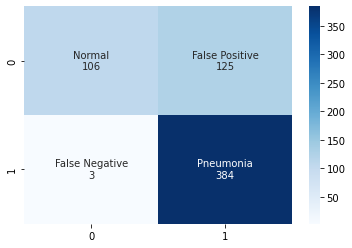

In [20]:
#confusion matrix as heat map

import seaborn as sns
c_matrix =confusion_matrix(y_test, y_test_nn)


group_names = ['Normal', 'False Positive', 'False Negative', 'Pneumonia']
group_counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2  in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')